### The goal of this competition is to identify several potential injuries in CT scans of trauma patients. Any of these injuries can be fatal on a short time frame if untreated so there is great value in rapid diagnosis.

### This competition uses a hidden test. When your submitted notebook is scored, the actual test data (including a full length sample submission) will be made available to your notebook.

# Display the first few rows of the DataFrame to inspect the data

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df=pd.read_csv("image_level_labels.csv")
df.head(10)

,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation
5,10004,21057,367,Active_Extravasation
6,10004,21057,368,Active_Extravasation
7,10004,21057,369,Active_Extravasation
8,10004,21057,370,Active_Extravasation
9,10004,21057,371,Active_Extravasation


In [5]:
df.shape

(12029, 4)

In [6]:
df['injury_name'].unique()

array(['Active_Extravasation', 'Bowel'], dtype=object)

In [7]:
df['patient_id'].unique().shape

(246,)

# Basic statistics about the data

In [8]:
df.describe()

,patient_id,series_id,instance_number
count,12029.000000,12029.000000,12029.000000
mean,34909.677862,31188.356056,311.704132
std,19532.614584,19532.946255,210.025487
min,33.000000,242.000000,11.000000
25%,15876.000000,14738.000000,130.000000
50%,36289.000000,28751.000000,252.000000
75%,53908.000000,49108.000000,456.000000
max,65456.000000,65514.000000,1065.000000


In [9]:
df['patient_id'].describe()

count    12029.000000
mean     34909.677862
std      19532.614584
min         33.000000
25%      15876.000000
50%      36289.000000
75%      53908.000000
max      65456.000000
Name: patient_id, dtype: float64

# Information about the DataFrame including data types and non-null counts

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12029 entries, 0 to 12028
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_id       12029 non-null  int64 
 1   series_id        12029 non-null  int64 
 2   instance_number  12029 non-null  int64 
 3   injury_name      12029 non-null  object
dtypes: int64(3), object(1)
memory usage: 376.0+ KB


In [11]:
df.isnull().sum()

patient_id         0
series_id          0
instance_number    0
injury_name        0
dtype: int64

# Check for and handle missing values

In [12]:
df.dropna(subset=["injury_name"], inplace=True)  # Drop rows with missing injury_name
df.shape

(12029, 4)

In [13]:
# Column name for which you want to check the data type
column_name = "patient_id"

# Get the data type of the specified column
data_type = df[column_name].dtype

print(f"Data type of '{column_name}': {data_type}")

Data type of 'patient_id': int64


# Identify duplicate rows

In [14]:
duplicate_rows = df[df.duplicated(subset=["patient_id", "series_id"], keep=False)]
duplicate_rows.head(10)
duplicate_rows.shape

(12020, 4)

# Remove duplicates

In [15]:
df1 = df.drop_duplicates(subset=["patient_id", "series_id"], keep="first")
df1.head(10)
df1.shape

(330, 4)

#Aggregation and Summary:
Instead of removing duplicates, you might want to aggregate the information from duplicate rows. For example, if you have multiple instances of the same injury for a patient, you could aggregate them into a single row that summarizes the injuries.

In [23]:
aggregated_data = df.groupby(["patient_id", "series_id"])["injury_name"].agg(list).reset_index()
aggregated_data.rename(columns={"injury_name": "aggregated_injuries"}, inplace=True)
aggregated_data["aggregated_injuries"] = aggregated_data["aggregated_injuries"].apply(lambda x: list(set(x)))
aggregated_data

,patient_id,series_id,aggregated_injuries
0,33,55570,"[Bowel, Active_Extravasation]"
1,43,24055,"[Bowel, Active_Extravasation]"
2,263,44610,[Active_Extravasation]
3,820,11921,"[Bowel, Active_Extravasation]"
4,820,38809,"[Bowel, Active_Extravasation]"
...,...,...,...
325,64194,25349,[Bowel]
326,64194,34232,[Bowel]
327,64256,12102,[Active_Extravasation]
328,64501,44668,[Active_Extravasation]


# Count the occurrences of each injury

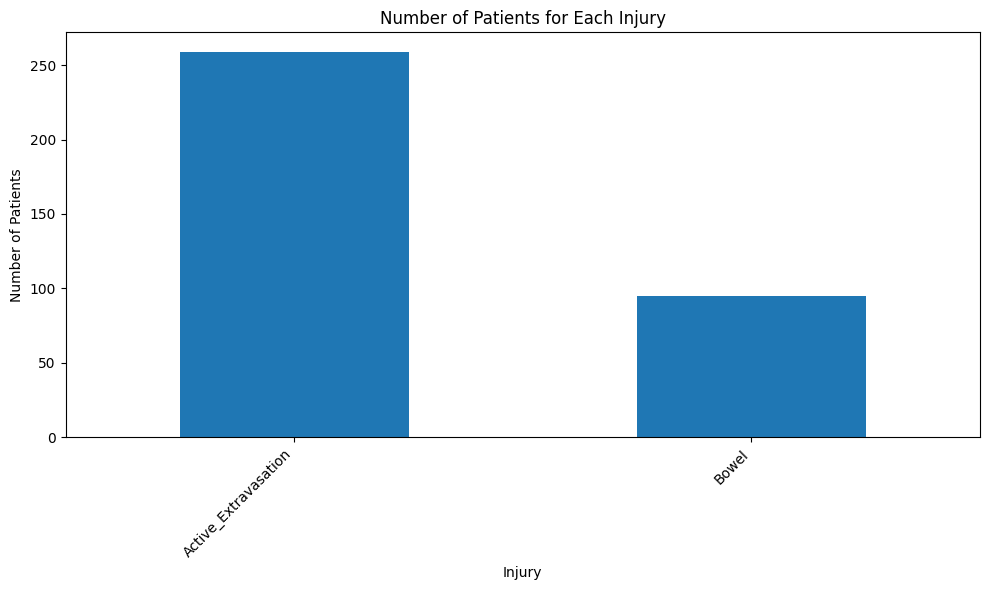

In [24]:
injury_counts = aggregated_data["aggregated_injuries"].explode().value_counts()
# Create a bar plot
plt.figure(figsize=(10, 6))
injury_counts.plot(kind="bar")
plt.title("Number of Patients for Each Injury")
plt.xlabel("Injury")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

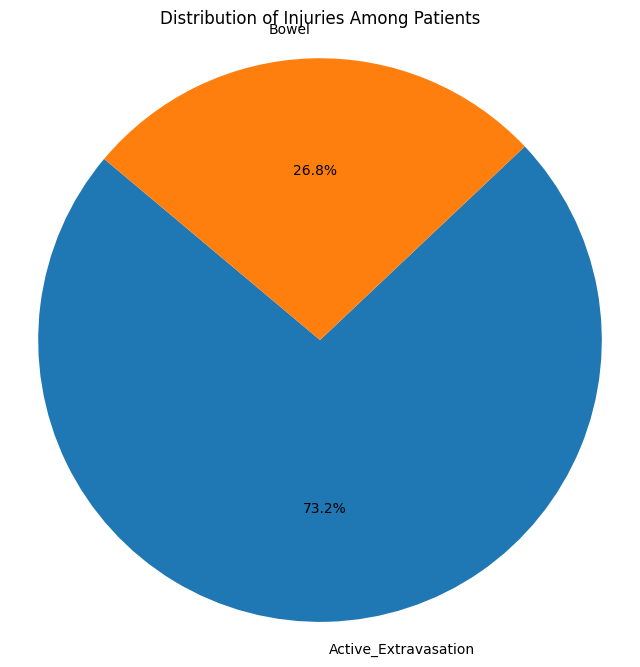

In [25]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(injury_counts, labels=injury_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Injuries Among Patients")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

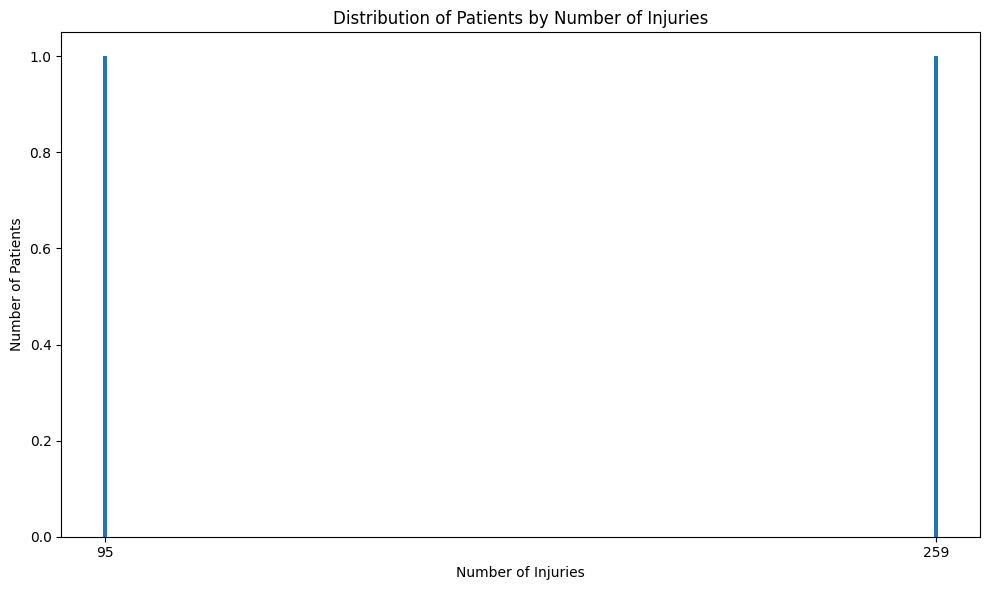

In [26]:
# Count the number of patients with each injury count
patient_counts = injury_counts.groupby(injury_counts).size()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(patient_counts.index, patient_counts.values, width=0.8)
plt.title("Distribution of Patients by Number of Injuries")
plt.xlabel("Number of Injuries")
plt.ylabel("Number of Patients")
plt.xticks(patient_counts.index)
plt.tight_layout()

# Show the histogram
plt.show()

In [36]:
df1.head(50)

,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
49,10004,51033,376,Active_Extravasation
105,10065,37324,48,Bowel
128,10217,16066,256,Active_Extravasation
184,10292,14945,20,Active_Extravasation
191,10494,65369,292,Active_Extravasation
205,10917,30843,179,Bowel
309,10917,47610,445,Bowel
372,10929,34169,70,Bowel
410,11044,37630,149,Active_Extravasation


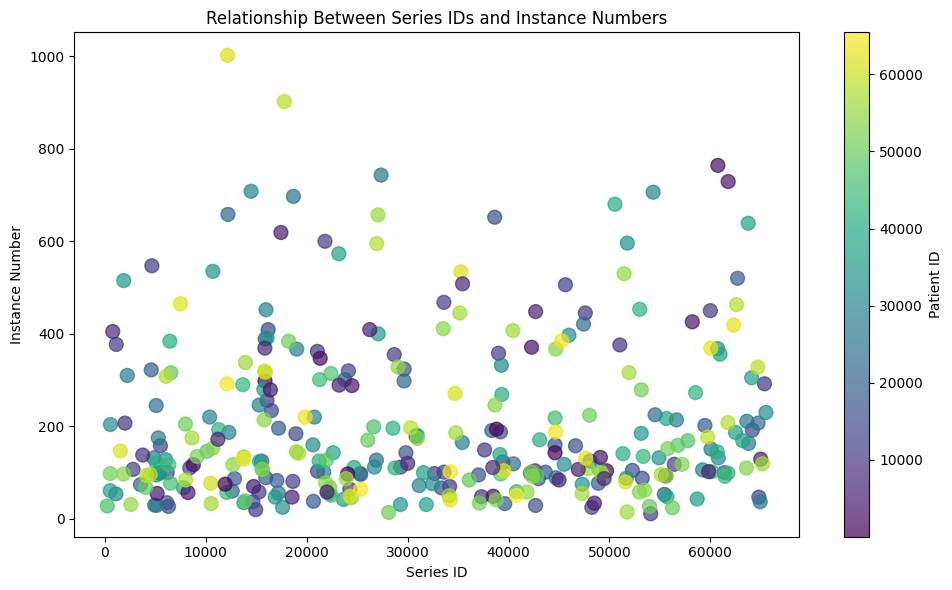

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df1["series_id"], df1["instance_number"], c=df1["patient_id"], cmap="viridis", s=100, alpha=0.7)
plt.colorbar(label="Patient ID")
plt.title("Relationship Between Series IDs and Instance Numbers")
plt.xlabel("Series ID")
plt.ylabel("Instance Number")
plt.tight_layout()

# Show the scatter plot
plt.show()

#Classification using skLearn

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Assuming df1 contains the provided data

# Split data into features (X) and target (y)
X = df1["patient_id"].astype(str)  # Using patient_id as a simple feature
y = df1["injury_name"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Pipeline with CountVectorizer and Naive Bayes classifier
pipeline = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("classifier", MultinomialNB())
])

# Define hyperparameters to tune
param_grid = {
    "vectorizer__binary": [True, False],  # Binary or term frequency counts
    "vectorizer__ngram_range": [(1, 1), (1, 2)],  # Unigrams or bigrams
    "classifier__alpha": [0.1, 1.0, 10.0]  # Smoothing parameter for Naive Bayes
}

# Use GridSearchCV or RandomizedSearchCV to find the best combination of hyperparameters
# Uncomment one of the following lines based on your preference

# grid_search = GridSearchCV(pipeline, param_grid, cv=5)
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

# Fit the search to the data
random_search.fit(X_train, y_train)

# Predict using the best model from the search
y_pred = random_search.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Best Parameters: {'vectorizer__ngram_range': (1, 1), 'vectorizer__binary': True, 'classifier__alpha': 0.1}
Best Cross-Validation Score: 0.85
Test Accuracy: 0.88
Classification Report:
                       precision    recall  f1-score   support

Active_Extravasation       0.86      1.00      0.92        48
               Bowel       1.00      0.56      0.71        18

            accuracy                           0.88        66
           macro avg       0.93      0.78      0.82        66
        weighted avg       0.90      0.88      0.87        66

